In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_207731/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("gen_train_75kwh.csv")
dataset.index = dataset["Unnamed: 0"]
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset.index.name="Date"
dataset

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2012-01-01,31.640374,22.968621,106.996890,110.484688,1406.238853
2012-01-02,30.297687,23.109223,107.094981,110.387431,1346.563878
2012-01-03,30.395406,24.785190,107.190916,110.282394,1350.906911
2012-01-04,30.523321,21.417917,107.284590,110.169622,1356.592031
2012-01-05,30.915956,23.264554,107.375902,110.049165,1374.042468
...,...,...,...,...,...
2016-12-27,30.188292,21.408000,106.559524,110.806436,1341.701845
2016-12-28,31.541250,22.578661,106.665553,110.742434,1401.833314
2016-12-29,30.719106,21.262559,106.769985,110.670488,1365.293596


In [3]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
temp_noise = np.random.normal(0,2,len(dataset["Temperature_C"]))
dataset["Temperature_C"] += temp_noise
x_train = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][:1400]
y_train = dataset["Energy_Generated_KWh"][:1400]

x_validation = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][1400:]
y_validation = dataset["Energy_Generated_KWh"][1400:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_validation = np.reshape(x_validation.values, (x_validation.shape[0], x_validation.shape[1], 1))


x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

2024-03-10 05:52:20.226783: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 05:52:20.254221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 05:52:20.254263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 05:52:20.254976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 05:52:20.259917: I tensorflow/core/platform/cpu_feature_guar

((1400, 4, 1), (1400,), (427, 4, 1), (427,))

In [4]:
import keras
from keras.layers import LSTM, Dense, BatchNormalization, Dropout, RNN, GRU
from keras.models import Sequential

In [5]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(BatchNormalization())
model.add(Dense(units = 1))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0012), loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 150, batch_size = 128)

2024-03-10 05:52:21.565292: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 05:52:21.591196: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 05:52:21.591362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/150


2024-03-10 05:52:26.191756: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-10 05:52:26.949745: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcbb818c5e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-10 05:52:26.949779: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-03-10 05:52:26.953689: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710030147.016157  207801 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 5s 4ms/step - loss: 900.5457
Epoch 2/150
11/11 [==============================] - 0s 4ms/step - loss: 894.0107
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 886.6202
Epoch 4/150
11/11 [==============================] - 0s 4ms/step - loss: 878.2419
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 868.6748
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 857.8297
Epoch 7/150
11/11 [==============================] - 0s 4ms/step - loss: 845.6578
Epoch 8/150
11/11 [==============================] - 0s 4ms/step - loss: 831.9957
Epoch 9/150
11/11 [==============================] - 0s 3ms/step - loss: 816.6108
Epoch 10/150
11/11 [==============================] - 0s 3ms/step - loss: 800.2623
Epoch 11/150
11/11 [==============================] - 0s 3ms/step - loss: 782.8448
Epoch 12/150
11/11 [==============================] - 0s 3ms/step - loss: 764.2554
Epoch 13/150
11/11 [=====

In [6]:
test_ds = pd.read_csv("gen_test_75kwh.csv")
test_ds.index = test_ds["Unnamed: 0"]
test_ds = test_ds.drop(["Unnamed: 0"], axis=1)
test_ds.index.name="Date"
test_ds

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2017-01-01,30.254286,20.507225,107.072437,110.407309,1344.634927
2017-01-02,29.477626,21.346532,107.169217,110.303927,1310.116719
2017-01-03,30.317197,22.463640,107.263767,110.192788,1347.430969
2017-01-04,31.252751,21.861981,107.355967,110.073943,1389.011161
2017-01-05,30.001559,22.533680,107.445699,109.947445,1333.402637
...,...,...,...,...,...
2019-12-27,30.171563,23.893602,106.479178,110.850240,1340.958373
2019-12-28,30.587784,22.454415,106.586441,110.792084,1359.457057
2019-12-29,31.622622,20.504883,106.692138,110.725965,1405.449858


In [7]:
x_test = test_ds[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]]
y_test = test_ds["Energy_Generated_KWh"]


x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape, y_test.shape

((1095, 4, 1), (1095,))

In [8]:
max(test_ds["Energy_Generated_KWh"])

33.97033938029172

35/35 [==============================] - 1s 1ms/step


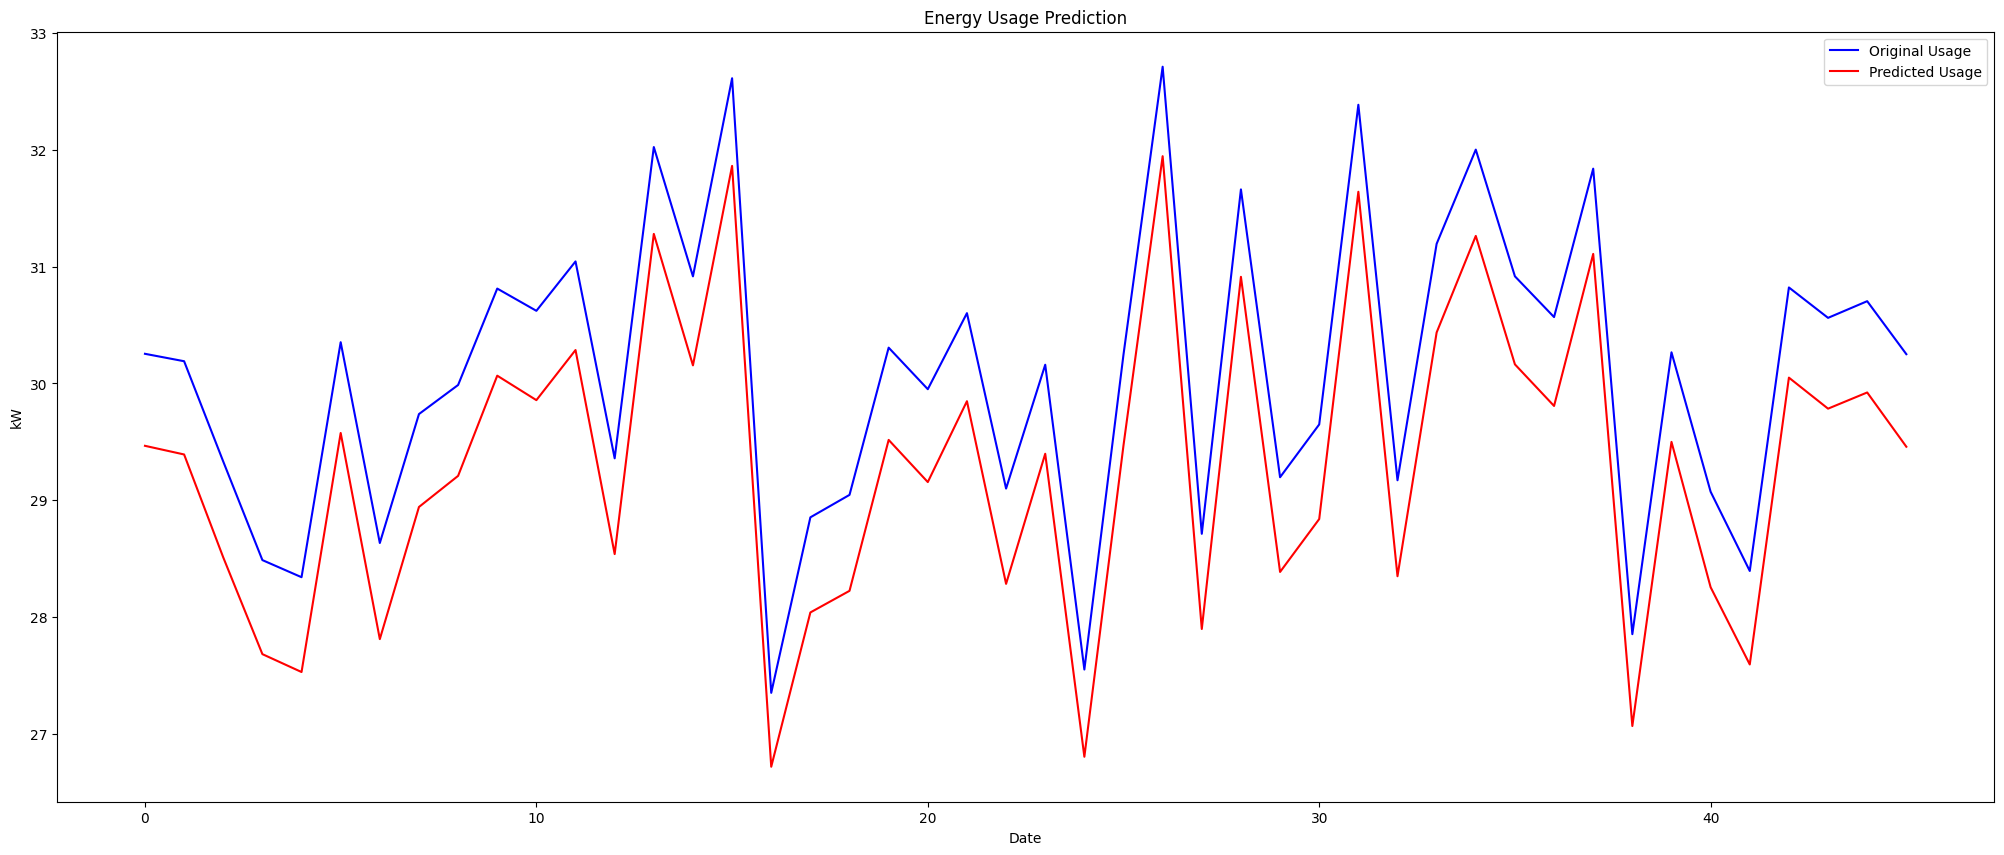

In [9]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

In [10]:
model.save("bestest75.h5")

/home/ujjwal/miniconda3/envs/tf2.15/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
def make_preds_return_average(model_path, test_data, start_date='2017-01-01', end_date='2019-12-31'):
    model_1 = tf.keras.models.load_model(model_path)
    predictions = model_1.predict(test_data)
    predictions_df = pd.DataFrame(predictions, columns=['preds'])
    predictions_df.index = pd.date_range(start=start_date, end=end_date, freq='D')
    return list(predictions_df.resample("ME").sum().resample("YE").mean()["preds"])
make_preds_return_average('bestest75.h5', x_test)

35/35 [==============================] - 1s 1ms/step


[896.0558471679688, 891.5657348632812, 889.9977416992188]